In [1]:
import matplotlib.pylab as plt
import numpy as np

import sys

import datetime as dt
import pandas as pd

import seaborn as sns

In [2]:


################################################################################
def sort_courses(courses):

    depts = []
    numbers = []
    unique_courses = []

    for course in courses:
        depts.append(course['id'].split()[0])
        numbers.append(int(course['id'].split()[1]))
        
        identifier = (course['id'],course['type'])
        if identifier not in unique_courses:
            unique_courses.append(identifier)

    idx = np.argsort(numbers)

    #print(idx)

    sorted_courses = []
    for i in idx:
        #print(courses[i])
        sorted_courses.append(courses[i])

    #print(unique_courses)
    unique_courses.sort()
    #print(unique_courses)

    new_courses = []
    for i,c in enumerate(unique_courses):

        new_courses.append({'identifier':c,'instances':[]})

        for course in sorted_courses:
            
            identifier = (course['id'],course['type'])
            if identifier == c:
                new_courses[i]['instances'].append(course)


    return new_courses

################################################################################

################################################################################
def term2date(term):

    # By hand
    #year = 2000 + int(term[1:])
    # Read in
    year = int(term.split()[-1])
    monthstart = 1
    monthend = 5
    daystart = 15
    dayend = 1
    # By hand
    #if term[0] == 'F':
    # Read in
    if term.find('Fall')>=0:
        monthstart = 9
        monthend = 12
        daystart = 1
        dayend = 15
    #day = 15
    # By hand
    #year = 2000 + int(term[1:])
    # Read in
    year = int(term.split()[-1])
    start = dt.datetime(year, monthstart, daystart, 0, 0)
    end = dt.datetime(year, monthend, dayend, 0, 0)

    return start,end

################################################################################




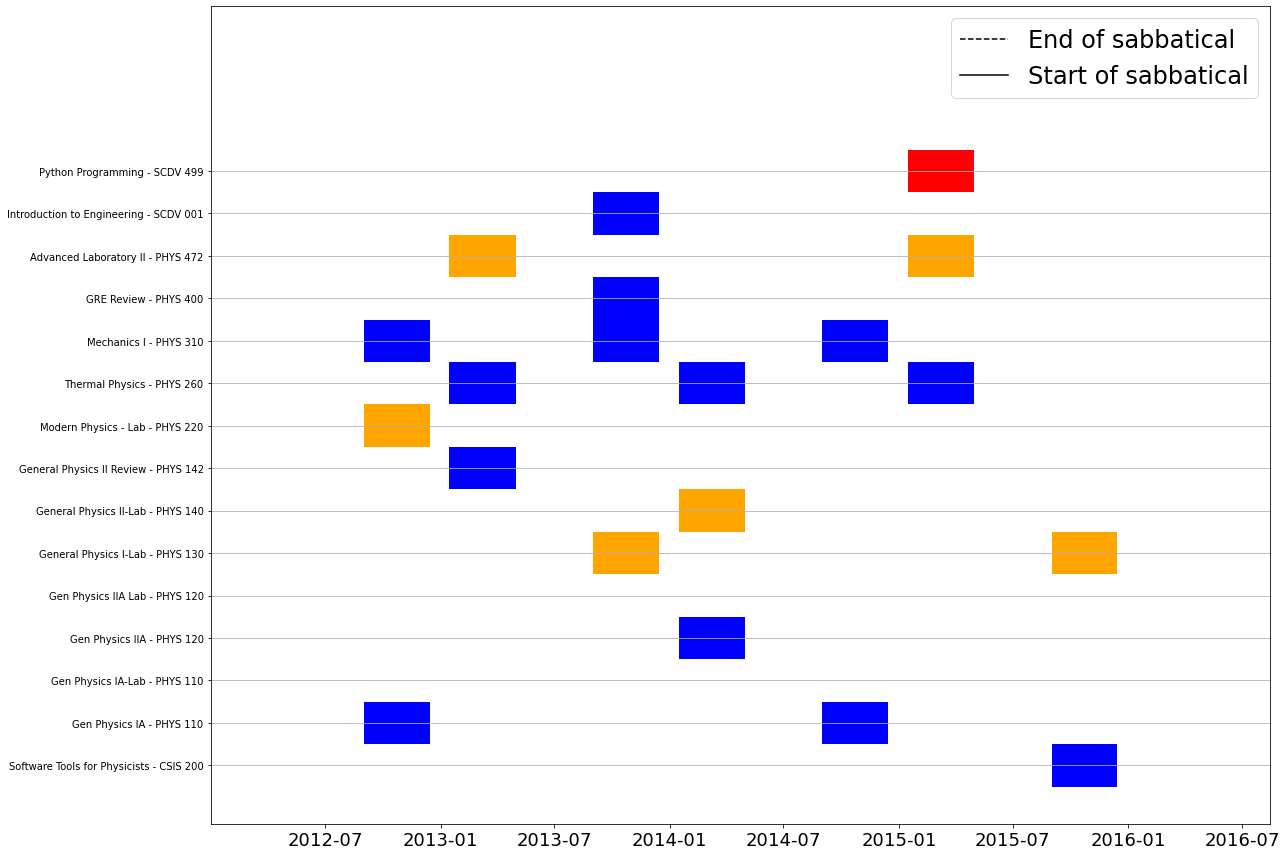

In [3]:
################################################################################
# Reading in from what we download from Banner
################################################################################
df = pd.read_html('courses_taught_downloads.html')
df = df[-1]
#df['name'] = df['Course Title']
#df['id'] = df['Course']
#df['term'] = df['Associated Term']
courses = []
nc = len(df)
for i in range(nc):
    course = {}
    course['id'] = df['Course'].iloc[i]
    course['name'] = df['Course Title'].iloc[i]
    course['term'] = df['Associated Term'].iloc[i]
    course['year'] = int(df['Associated Term'].iloc[i].split()[-1])
    course['nstudents'] = 18
    if df['Course Title'].iloc[i].find('Lab')>=0:
        course['type'] = 1
    elif df['Course'].iloc[i].find('499')>=0:
        course['type'] = 2
    else:
        course['type'] = 0

    if course['year'] > 2015:
        continue
    courses.append(course)



courses = sort_courses(courses)

#print(courses)

fig, ax = plt.subplots(figsize=(18,12))
course_names = []
for i,course in enumerate(courses):
    #identifier = course['identifier'][0]
    identifier = '{0} - {1}'.format(course['instances'][0]['name'],course['identifier'][0])
    course_names.append(identifier)
    #print(identifier)
    for instance in course['instances']:
        start,end = term2date(instance['term'])
        xranges = [(start,end-start)]
        yrange = (i,1.0)
        # Plot the broken horizontal bars
        #print(xranges)
        fc = 'blue'
        if instance['type']==1:
            fc = 'orange'
        elif instance['type']==2:
            fc = 'red'
        plt.broken_barh(xranges, yrange, facecolors=fc)

#course_names.reverse()
#print(course_names)
y_pos = np.arange(0,len(courses),1) + 0.5
ax.set_yticks(y_pos)
ax.set_yticklabels(course_names)
plt.grid(axis='y')

plt.xlim(dt.datetime(2012,1,1,1,1))

sabbatical_start = dt.datetime(2018,9,1)
sabbatical_end = dt.datetime(2019,9,1)

plt.plot([sabbatical_end,sabbatical_end],[0,y_pos[-1]+3],'k--',label='End of sabbatical')
plt.plot([sabbatical_start,sabbatical_start],[0,y_pos[-1]+3],'k-',label='Start of sabbatical')



ax.xaxis_date()
plt.xticks(fontsize=18)

plt.legend(fontsize=24)

plt.tight_layout()

########################################################



In [4]:
df

,Associated Term,CRN,Course,Course Title,Course Title.1,Course Title.2,Credits,Level,Campus,Instructional Method,Open for Registration,Status
0,Fall 2023,38655,PHYS 220,Modern Physics,Modern Physics,Modern Physics,4.0,Graduate,Main,Classroom,Yes,Active
1,Fall 2023,38656,PHYS 220,Modern Physics - Lab,Modern Physics - Lab,Modern Physics - Lab,0.0,Graduate,Main,Classroom,Yes,Active
2,Spring 2023,47771,PHYS 260,Thermal Physics,Thermal Physics,Thermal Physics,3.0,Undergraduate,Main,Classroom,No,Active
3,Spring 2023,47829,SCDV 490,Data Science Team Project,Data Science Team Project,Data Science Team Project,3.0,Undergraduate,Main,Classroom,No,Active
4,Spring 2023,48154,PHYS 499,Cloud Chamber,Cloud Chamber,Cloud Chamber,0.0,Undergraduate,Main,To Be Determined,No,Active
...,...,...,...,...,...,...,...,...,...,...,...,...
108,Fall 2012,31954,PHYS 110,Gen Physics IA,Gen Physics IA,Gen Physics IA,4.0,Graduate,Main,NaN,No,Active
109,Fall 2012,32043,PHYS 220,Modern Physics - Lab,Modern Physics - Lab,Modern Physics - Lab,0.0,Graduate,Main,NaN,No,Active
110,Fall 2003,30006,PHYS 110,Gen Physics IA,Gen Physics IA,Gen Physics IA,4.0,Graduate,Main,NaN,No,Active
111,Spring 2003,40078,PHYS 120,Gen Physics IIA Lab,Gen Physics IIA Lab,Gen Physics IIA Lab,0.0,Graduate,Main,NaN,No,Active


In [5]:
#courses

In [6]:
df.sort_values(by='Associated Term')

,Associated Term,CRN,Course,Course Title,Course Title.1,Course Title.2,Credits,Level,Campus,Instructional Method,Open for Registration,Status
112,Fall 2002,30459,PHYS 110,Gen Physics IA-Lab,Gen Physics IA-Lab,Gen Physics IA-Lab,0.0,Graduate,Main,NaN,No,Active
110,Fall 2003,30006,PHYS 110,Gen Physics IA,Gen Physics IA,Gen Physics IA,4.0,Graduate,Main,NaN,No,Active
109,Fall 2012,32043,PHYS 220,Modern Physics - Lab,Modern Physics - Lab,Modern Physics - Lab,0.0,Graduate,Main,NaN,No,Active
108,Fall 2012,31954,PHYS 110,Gen Physics IA,Gen Physics IA,Gen Physics IA,4.0,Graduate,Main,NaN,No,Active
107,Fall 2012,30842,PHYS 310,Mechanics I,Mechanics I,Mechanics I,4.0,Graduate,Main,NaN,No,Active
...,...,...,...,...,...,...,...,...,...,...,...,...
2,Spring 2023,47771,PHYS 260,Thermal Physics,Thermal Physics,Thermal Physics,3.0,Undergraduate,Main,Classroom,No,Active
10,Spring 2023,48275,SCDV 499,Hidden Gender Bias,Hidden Gender Bias,Hidden Gender Bias,0.0,Undergraduate,Main,To Be Determined,No,Active
7,Spring 2023,48254,PHYS 499,Subtractive Mfg II,Subtractive Mfg II,Subtractive Mfg II,0.0,Undergraduate,Main,To Be Determined,No,Active
5,Spring 2023,48239,PHYS 499,Open Physics Data,Open Physics Data,Open Physics Data,0.0,Undergraduate,Main,To Be Determined,No,Active


In [7]:
# Add some columns
#df.columns
year = []
term = []
start = []
end = []
lab = []
independent_study = []

ncourses = len(df)

for i in range(ncourses):
    aterm = df.iloc[i]['Associated Term']
    s,e = term2date(aterm)
    #print(start,end)
    year.append(s.year)
    term.append(aterm.split()[0])
    start.append(s)
    end.append(e)
    
    if df.iloc[i]['Course Title'].find('Lab')>=0 or df.iloc[i]['Course Title'].find('lab')>=0:
        lab.append('Lab')
    elif df.iloc[i]['Course'].find('499')>=0 or df.iloc[i]['Course'].find('497')>=0 or \
    df.iloc[i]['Course'].find('HNRS')>=0:
        lab.append("IS")
    else:
        lab.append('Lecture')
        
    if df.iloc[i]['Course'].find('499')>=0 or df.iloc[i]['Course'].find('497')>=0 or \
    df.iloc[i]['Course'].find('HNRS')>=0:
        independent_study.append("IS")
    else:
        independent_study.append("NO")
    
    #print(df.iloc[i]['Instructional Method'])
        

        
df['year'] = year
df['term'] = term
df['start'] = start
df['end'] = end
df['type'] = lab
df['independent study'] = independent_study


df

,Associated Term,CRN,Course,Course Title,Course Title.1,Course Title.2,Credits,Level,Campus,Instructional Method,Open for Registration,Status,year,term,start,end,type,independent study
0,Fall 2023,38655,PHYS 220,Modern Physics,Modern Physics,Modern Physics,4.0,Graduate,Main,Classroom,Yes,Active,2023,Fall,2023-09-01,2023-12-15,Lecture,NO
1,Fall 2023,38656,PHYS 220,Modern Physics - Lab,Modern Physics - Lab,Modern Physics - Lab,0.0,Graduate,Main,Classroom,Yes,Active,2023,Fall,2023-09-01,2023-12-15,Lab,NO
2,Spring 2023,47771,PHYS 260,Thermal Physics,Thermal Physics,Thermal Physics,3.0,Undergraduate,Main,Classroom,No,Active,2023,Spring,2023-01-15,2023-05-01,Lecture,NO
3,Spring 2023,47829,SCDV 490,Data Science Team Project,Data Science Team Project,Data Science Team Project,3.0,Undergraduate,Main,Classroom,No,Active,2023,Spring,2023-01-15,2023-05-01,Lecture,NO
4,Spring 2023,48154,PHYS 499,Cloud Chamber,Cloud Chamber,Cloud Chamber,0.0,Undergraduate,Main,To Be Determined,No,Active,2023,Spring,2023-01-15,2023-05-01,IS,IS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Fall 2012,31954,PHYS 110,Gen Physics IA,Gen Physics IA,Gen Physics IA,4.0,Graduate,Main,NaN,No,Active,2012,Fall,2012-09-01,2012-12-15,Lecture,NO
109,Fall 2012,32043,PHYS 220,Modern Physics - Lab,Modern Physics - Lab,Modern Physics - Lab,0.0,Graduate,Main,NaN,No,Active,2012,Fall,2012-09-01,2012-12-15,Lab,NO
110,Fall 2003,30006,PHYS 110,Gen Physics IA,Gen Physics IA,Gen Physics IA,4.0,Graduate,Main,NaN,No,Active,2003,Fall,2003-09-01,2003-12-15,Lecture,NO
111,Spring 2003,40078,PHYS 120,Gen Physics IIA Lab,Gen Physics IIA Lab,Gen Physics IIA Lab,0.0,Graduate,Main,NaN,No,Active,2003,Spring,2003-01-15,2003-05-01,Lab,NO


In [8]:
#df['independent study']
df.columns

Index(['Associated Term', 'CRN', 'Course', 'Course Title', 'Course Title.1',
       'Course Title.2', 'Credits', 'Level', 'Campus', 'Instructional Method',
       'Open for Registration', 'Status', 'year', 'term', 'start', 'end',
       'type', 'independent study'],
      dtype='object')

In [9]:
# Replace some names with other names
#mask = df['Course Title'] == 'Gen Physics IA Lect'
#df[mask]['Course Title'] = 'Gen Physics IA'

df['Course Title'].replace('Gen Physics IA Lect', 'Gen Physics IA', inplace=True)
df['Course Title'].replace('FRES:Intro EDA & Visualization', 'Intro to Exp. Data Analysis and Viz.', inplace=True)
df['Course Title'].replace('FRESH: Intro to EDA & Visual', 'Intro to Exp. Data Analysis and Viz.', inplace=True)
df['Course Title'].replace('Gen Physics IA-Lab', 'Gen Physics IA Lab', inplace=True)
df['Course Title'].replace('Nuclear & Particle Physics', 'Nuclear and Particle Physics', inplace=True)
df['Course Title'].replace('Software tools for Physicists', 'Software Tools for Physicists', inplace=True)

# CSIS 106 is cross-listed with SCDV 110
df.drop(df[df['Course'] == 'CSIS 106'].index, inplace = True)



In [10]:
df


,Associated Term,CRN,Course,Course Title,Course Title.1,Course Title.2,Credits,Level,Campus,Instructional Method,Open for Registration,Status,year,term,start,end,type,independent study
0,Fall 2023,38655,PHYS 220,Modern Physics,Modern Physics,Modern Physics,4.0,Graduate,Main,Classroom,Yes,Active,2023,Fall,2023-09-01,2023-12-15,Lecture,NO
1,Fall 2023,38656,PHYS 220,Modern Physics - Lab,Modern Physics - Lab,Modern Physics - Lab,0.0,Graduate,Main,Classroom,Yes,Active,2023,Fall,2023-09-01,2023-12-15,Lab,NO
2,Spring 2023,47771,PHYS 260,Thermal Physics,Thermal Physics,Thermal Physics,3.0,Undergraduate,Main,Classroom,No,Active,2023,Spring,2023-01-15,2023-05-01,Lecture,NO
3,Spring 2023,47829,SCDV 490,Data Science Team Project,Data Science Team Project,Data Science Team Project,3.0,Undergraduate,Main,Classroom,No,Active,2023,Spring,2023-01-15,2023-05-01,Lecture,NO
4,Spring 2023,48154,PHYS 499,Cloud Chamber,Cloud Chamber,Cloud Chamber,0.0,Undergraduate,Main,To Be Determined,No,Active,2023,Spring,2023-01-15,2023-05-01,IS,IS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Fall 2012,31954,PHYS 110,Gen Physics IA,Gen Physics IA,Gen Physics IA,4.0,Graduate,Main,NaN,No,Active,2012,Fall,2012-09-01,2012-12-15,Lecture,NO
109,Fall 2012,32043,PHYS 220,Modern Physics - Lab,Modern Physics - Lab,Modern Physics - Lab,0.0,Graduate,Main,NaN,No,Active,2012,Fall,2012-09-01,2012-12-15,Lab,NO
110,Fall 2003,30006,PHYS 110,Gen Physics IA,Gen Physics IA,Gen Physics IA,4.0,Graduate,Main,NaN,No,Active,2003,Fall,2003-09-01,2003-12-15,Lecture,NO
111,Spring 2003,40078,PHYS 120,Gen Physics IIA Lab,Gen Physics IIA Lab,Gen Physics IIA Lab,0.0,Graduate,Main,NaN,No,Active,2003,Spring,2003-01-15,2003-05-01,Lab,NO


In [11]:
mask = df['independent study'] != 'IS'
ser = df[mask].sort_values('Course')[['Course','Course Title']].value_counts()
#df[['type']].value_counts()

#type(dftmp)

ser.sort_index()


Course    Course Title                        
ASTR 332  Astrophysics Seminar II                 2
CSIS 200  Software Tools for Physicists           5
PHYS 010  Physics of Music                        1
PHYS 015  Quarks, Quanta and Quasars              4
PHYS 110  Gen Physics IA                          7
          Gen Physics IA Lab                      3
PHYS 120  Gen Physics IIA                         1
          Gen Physics IIA Lab                     1
PHYS 130  General Physics I                       1
          General Physics I-Lab                   3
PHYS 140  General Physics II-Lab                  2
PHYS 142  General Physics II Review               3
PHYS 220  Modern Physics                          1
          Modern Physics - Lab                    3
PHYS 250  Computational Physics-Lab               3
          Intro to Computational Physics          4
PHYS 260  Thermal Physics                         6
PHYS 310  Mechanics I                             3
PHYS 400  GRE Rev

In [12]:
df

,Associated Term,CRN,Course,Course Title,Course Title.1,Course Title.2,Credits,Level,Campus,Instructional Method,Open for Registration,Status,year,term,start,end,type,independent study
0,Fall 2023,38655,PHYS 220,Modern Physics,Modern Physics,Modern Physics,4.0,Graduate,Main,Classroom,Yes,Active,2023,Fall,2023-09-01,2023-12-15,Lecture,NO
1,Fall 2023,38656,PHYS 220,Modern Physics - Lab,Modern Physics - Lab,Modern Physics - Lab,0.0,Graduate,Main,Classroom,Yes,Active,2023,Fall,2023-09-01,2023-12-15,Lab,NO
2,Spring 2023,47771,PHYS 260,Thermal Physics,Thermal Physics,Thermal Physics,3.0,Undergraduate,Main,Classroom,No,Active,2023,Spring,2023-01-15,2023-05-01,Lecture,NO
3,Spring 2023,47829,SCDV 490,Data Science Team Project,Data Science Team Project,Data Science Team Project,3.0,Undergraduate,Main,Classroom,No,Active,2023,Spring,2023-01-15,2023-05-01,Lecture,NO
4,Spring 2023,48154,PHYS 499,Cloud Chamber,Cloud Chamber,Cloud Chamber,0.0,Undergraduate,Main,To Be Determined,No,Active,2023,Spring,2023-01-15,2023-05-01,IS,IS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Fall 2012,31954,PHYS 110,Gen Physics IA,Gen Physics IA,Gen Physics IA,4.0,Graduate,Main,NaN,No,Active,2012,Fall,2012-09-01,2012-12-15,Lecture,NO
109,Fall 2012,32043,PHYS 220,Modern Physics - Lab,Modern Physics - Lab,Modern Physics - Lab,0.0,Graduate,Main,NaN,No,Active,2012,Fall,2012-09-01,2012-12-15,Lab,NO
110,Fall 2003,30006,PHYS 110,Gen Physics IA,Gen Physics IA,Gen Physics IA,4.0,Graduate,Main,NaN,No,Active,2003,Fall,2003-09-01,2003-12-15,Lecture,NO
111,Spring 2003,40078,PHYS 120,Gen Physics IIA Lab,Gen Physics IIA Lab,Gen Physics IIA Lab,0.0,Graduate,Main,NaN,No,Active,2003,Spring,2003-01-15,2003-05-01,Lab,NO


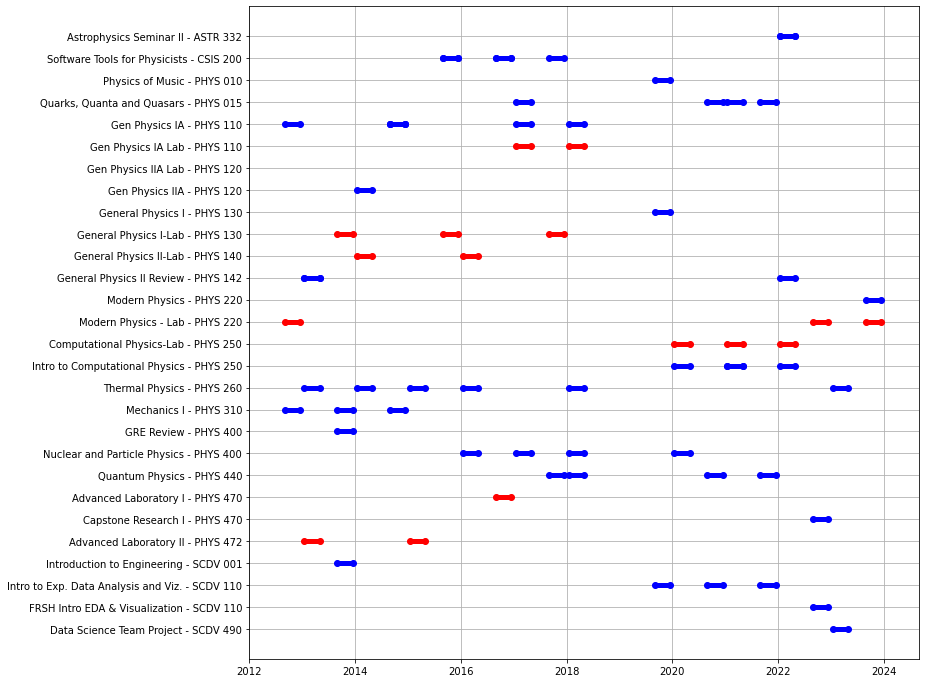

In [13]:
nrows = len(df)

plt.figure(figsize=(12,12))

for i in range(nrows):
    x = df.sort_values('Course', ascending=False).iloc[i]
    #print(x)
    start = x['start']
    end = x['end']
    #y = f"{x['Course']} - {x['Course Title']}"
    y = f"{x['Course Title']} - {x['Course']}"

    
    t = x['type']
    color = 'blue'
    if t=='Lecture':
        color='blue'
    elif t=='Lab':
        color='red'
    
    if x['independent study'] == 'IS':
        continue
    
    plt.plot([start,end],[y,y],'o-', linewidth=5, color=color)
    
plt.xlim(pd.Timestamp('2012-01-01'), pd.Timestamp('2024-09-01')) 
#plt.xlim(pd.Timestamp('2012-01-01'), pd.Timestamp('2016-01-01')) 

plt.grid(axis='both')
  

In [14]:
'''
fig, ax = plt.subplots(figsize=(18,12))
course_names = []
for i,course in enumerate(courses):
    #identifier = course['identifier'][0]
    identifier = '{0} - {1}'.format(course['instances'][0]['name'],course['identifier'][0])
    course_names.append(identifier)
    #print(identifier)
    for instance in course['instances']:
        start,end = term2date(instance['term'])
        xranges = [(start,end-start)]
        yrange = (i,1.0)
        # Plot the broken horizontal bars
        #print(xranges)
        fc = 'blue'
        if instance['type']==1:
            fc = 'orange'
        elif instance['type']==2:
            fc = 'red'
        plt.broken_barh(xranges, yrange, facecolors=fc)

#course_names.reverse()
#print(course_names)
y_pos = np.arange(0,len(courses),1) + 0.5
ax.set_yticks(y_pos)
ax.set_yticklabels(course_names)
plt.grid(axis='y')

plt.xlim(dt.datetime(2012,1,1,1,1))

sabbatical_start = dt.datetime(2018,9,1)
sabbatical_end = dt.datetime(2019,9,1)

plt.plot([sabbatical_end,sabbatical_end],[0,y_pos[-1]+3],'k--',label='End of sabbatical')
plt.plot([sabbatical_start,sabbatical_start],[0,y_pos[-1]+3],'k-',label='Start of sabbatical')



ax.xaxis_date()
plt.xticks(fontsize=18)

plt.legend(fontsize=24)

plt.tight_layout()

########################################################
'''


"\nfig, ax = plt.subplots(figsize=(18,12))\ncourse_names = []\nfor i,course in enumerate(courses):\n    #identifier = course['identifier'][0]\n    identifier = '{0} - {1}'.format(course['instances'][0]['name'],course['identifier'][0])\n    course_names.append(identifier)\n    #print(identifier)\n    for instance in course['instances']:\n        start,end = term2date(instance['term'])\n        xranges = [(start,end-start)]\n        yrange = (i,1.0)\n        # Plot the broken horizontal bars\n        #print(xranges)\n        fc = 'blue'\n        if instance['type']==1:\n            fc = 'orange'\n        elif instance['type']==2:\n            fc = 'red'\n        plt.broken_barh(xranges, yrange, facecolors=fc)\n\n#course_names.reverse()\n#print(course_names)\ny_pos = np.arange(0,len(courses),1) + 0.5\nax.set_yticks(y_pos)\nax.set_yticklabels(course_names)\nplt.grid(axis='y')\n\nplt.xlim(dt.datetime(2012,1,1,1,1))\n\nsabbatical_start = dt.datetime(2018,9,1)\nsabbatical_end = dt.datetime(20